# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## 1: Plot number of people by gender

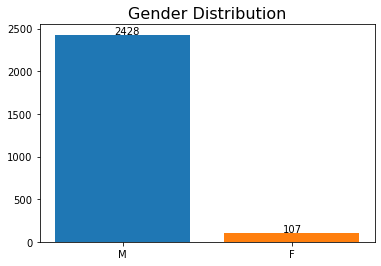

In [4]:
df= kill.groupby('gender').id.count()
xpos = np.arange(len(df))
index = df.index.values.tolist() 
index.reverse()
values = df.values.tolist()

fig, ax = plt.subplots(figsize=(6,4))


ax.bar(xpos[0], values[1])
ax.bar(xpos[1], values[0])

plt.xticks(xpos, index)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+1));
    
plt.title('Gender Distribution', fontsize = 16)

plt.show()



## 2: Plot 7 most common kill weapons

In [7]:
common_weapons = kill.armed.value_counts().iloc[:7]
common_weapons

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

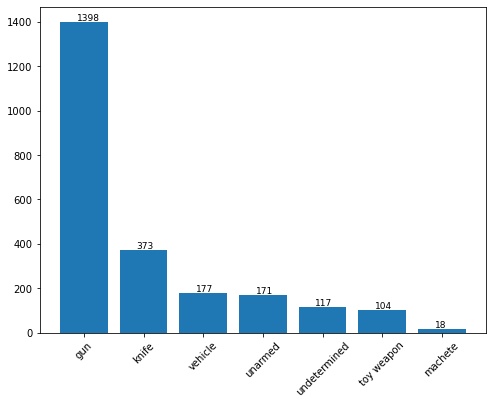

In [197]:
common_weapons = kill.armed.value_counts().iloc[:7]
xpos = np.arange(len(common_weapons))

fig, ax = plt.subplots(figsize=(8,6))

ax.bar(xpos, common_weapons.values.tolist())
plt.xticks(xpos, common_weapons.index, rotation = 45)

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.28, i.get_height()+7.2, \
            str(i.get_height()), fontsize=9,
                color='black')
       
plt.show()



## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [9]:
kill['age_cat']=kill['age']>25
kill['age_cat'] = kill['age_cat'].map({True: "above25", False:"below25"})
kill

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False,above25
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False,below25
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False,above25
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True,above25


In [10]:
kill['age_cat'].value_counts()

above25    1905
below25     630
Name: age_cat, dtype: int64

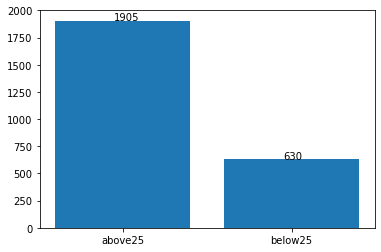

In [11]:
df = kill['age_cat'].value_counts()
xpos = np.arange(len(df))
index = df.index.values.tolist()
vals = df.values.tolist()


fig, ax = plt.subplots(figsize = (6,4))

ax.bar( xpos, vals)
plt.xticks(xpos, index)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+1));

## 4: Plot number of killed poeple by race

In [12]:
df = kill.race.value_counts()
df

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

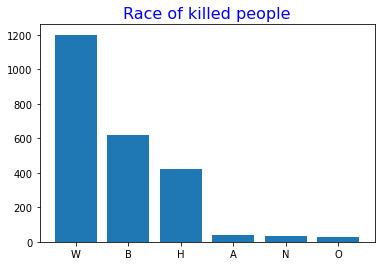

In [13]:
df = kill.race.value_counts()
xpos = np.arange(len(df))
index = df.index.values.tolist()
vals = df.values.tolist()

fgr, ax = plt.subplots(figsize= (6,4))

ax.bar(xpos, vals)
plt.xticks(xpos, index)
plt.title("Race of killed people", color = "Blue", fontsize = 16)


plt.show()

## 5: Killed People According to Races (Pie Chart)

In [205]:
kill['race'].unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [14]:
kill['race'].value_counts(dropna = False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [19]:
kill.dropna(inplace = True)

In [20]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [22]:
df = kill.race.value_counts(dropna = False)

In [23]:
df

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [24]:
df.index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [25]:
df.values

array([1168,  592,  401,   36,   29,   28], dtype=int64)

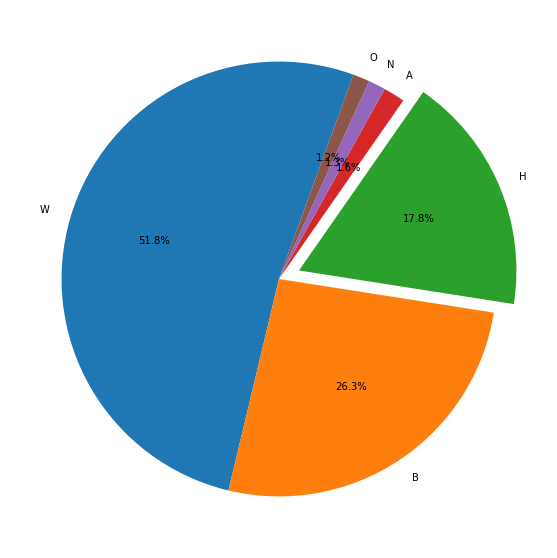

In [26]:
df = kill.race.value_counts()
index = df.index
vals = df.values
explode = (0, 0, 0.1, 0, 0, 0)

fig, ax = plt.subplots(figsize = (14,10))

ax.pie(df.values, labels = index, normalize = True, explode=explode, autopct='%1.1f%%',startangle=70);